# <font color='#fddf0a'>**Pi Challenge**</font>
---

# <font color='#aeafaf'>**Índice**</font>

1. <font color='#7099c2'>**Descripción del Notebook**</font>
2. <font color='#7099c2'>**Configuraciones**</font>
   - Importación de Librerías
   - Paths
   - Paleta de Colores del Proyecto
3. <font color='#7099c2'>**Extracción de Datos**</font>
   - Extracción de Datos
   - Exploración Inicial
   - Tratamiento de Valores Faltantes
   - Normalización de Datos
4. <font color='#7099c2'>**Análisis Exploratorio de Datos (EDA)**</font>
   - Productos
   - Tiendas
5. <font color='#7099c2'>**Modelado**</font>

# <font color='#7099c2'>**Descripción del Notebook**</font>

# <font color='#7099c2'>**Configuraciones**</font>

## <font color='#fde74c'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

import os
import warnings
import pickle

from timeit import default_timer as timer
from datetime import datetime

from pathlib import Path
from typing import Tuple, Callable, List

## <font color='#fde74c'>**Paths**</font>

In [2]:
# Obtiene el path actual
PROJECT_PATH = os.getcwd()

data = Path('data')
DATA_PATH = PROJECT_PATH / data

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports


dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directorio creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\data

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\PiChallenge\reports



## <font color='#fde74c'>**Paleta de Colores del Proyecto**</font>

**Amarillos (Basados en #fddf0a)**

<span style="display:inline-block; width:20px; height:20px; background:#b29b07; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fddf0a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fde74c; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#fef08d; margin-right:5px;"></span>


**Violetas (Basados en #c30afd)**

<span style="display:inline-block; width:20px; height:20px; background:#7b06a1; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#c30afd; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#d451fd; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#e698fe; margin-right:5px;"></span>


**Grises / Neutros (Basados en #474848)**

<span style="display:inline-block; width:20px; height:20px; background:#2e2f2f; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#474848; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#7a7b7b; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#aeafaf; margin-right:5px;"></span>


**Azules**

<span style="display:inline-block; width:20px; height:20px; background:#0a1a2f; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#1c3d5a; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#336699; margin-right:5px;"></span>
<span style="display:inline-block; width:20px; height:20px; background:#7099c2; margin-right:5px;"></span>


In [3]:
# Paleta de Colores del Proyecto
AMARILLO_1, AMARILLO_2, AMARILLO_3, AMARILLO_4 = '#b29b07', '#fddf0a', '#fde74c', '#fef08d'
VIOLETA_1, VIOLETA_2, VIOLETA_3, VIOLETA_4 = '#7b06a1', '#c30afd', '#d451fd', '#e698fe'
GRIS_1, GRIS_2, GRIS_3, GRIS_4 = '#2e2f2f', '#474848', '#7a7b7b', '#aeafaf'
AZUL_1, AZUL_2, AZUL_3, AZUL_4 = '#0a1a2f', '#1c3d5a', '#336699', '#7099c2'

In [4]:
# Definir los colores personalizados
custom_colors = [

    '#0a1a2f', '#1c3d5a', '#336699', '#7099c2', 
    '#e698fe', '#d451fd', '#c30afd', '#7b06a1',
    '#7b06a1', '#c30afd', '#d451fd', '#e698fe',
    '#b29b07', '#fddf0a', '#fde74c', '#fef08d', 
    
]

# Crear el colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
reverse_custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors[::-1])

#### **Colores Principales Pi**

`AMARILLO_2` = '#fddf0a'<br>
`VIOLETA_2` = '#c30afd'

# <font color='#7099c2'>**Extracción de datos y exploración inicial**</font>

## <font color='#fde74c'>**Extracción de datos**</font>

In [5]:
train_ds = pd.read_csv(DATA_PATH/ 'Train_BigMart.csv')
test_ds = pd.read_csv(DATA_PATH/ 'Test_BigMart.csv')

## <font color='#fde74c'>**Exploración inicial**</font>

### <font color='#e698fe'>**Train Set**</font>

In [6]:
train_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Valores nulos en `Item_Weight` y `Outlet_Size`

In [8]:
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train_ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
categoricas = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 
               'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [11]:
for col in categoricas:
    unicos = train_ds[col].unique()
    q = train_ds[col].nunique()
    print(f'Valores únicos para {col}: {q}\n')
    print(unicos)
    print('\n','=' * 75,'\n')

Valores únicos para Item_Fat_Content: 5

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Valores únicos para Item_Type: 16

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Valores únicos para Outlet_Identifier: 10

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Valores únicos para Outlet_Establishment_Year: 9

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


Valores únicos para Outlet_Size: 3

['Medium' nan 'High' 'Small']


Valores únicos para Outlet_Location_Type: 3

['Tier 1' 'Tier 3' 'Tier 2']


Valores únicos para Outlet_Type: 4

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




### <font color='#e698fe'>**Test Set**</font>

In [12]:
test_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Valores nulos en `Item_Weight` y `Outlet_Size`

In [14]:
test_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [15]:
for col in categoricas:
    unicos = test_ds[col].unique()
    q = test_ds[col].nunique()
    print(f'Valores únicos: {q}\n')
    print(unicos)
    print('\n','=' * 75,'\n')

Valores únicos: 5

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


Valores únicos: 16

['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


Valores únicos: 10

['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']


Valores únicos: 9

[1999 2007 1998 1985 1997 2009 2002 1987 2004]


Valores únicos: 3

['Medium' nan 'Small' 'High']


Valores únicos: 3

['Tier 1' 'Tier 2' 'Tier 3']


Valores únicos: 4

['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']




## <font color='#fde74c'>**Tratamiento de Valores Faltantes**</font>

### <font color='#e698fe'>**Item_Weight**</font>

In [16]:
train_ds['Item_Identifier'].nunique()

1559

In [17]:
# Filtrar los registros que tienen valores nulos en la columna 'Item_Weight'
non_weight = train_ds[train_ds['Item_Weight'].isna()]

In [18]:
non_weight

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [19]:
train_ds[train_ds['Item_Identifier'] == 'FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [20]:
train_ds[train_ds['Item_Identifier'] == 'DRI11']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


In [21]:
item_weight_map = train_ds.groupby('Item_Identifier')['Item_Weight'].max()

train_ds['Item_Weight'] = train_ds['Item_Weight'].fillna(train_ds['Item_Identifier'].map(item_weight_map))

In [22]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### <font color='#c30afd'>**Observaciones Tratamiento de Valores Faltantes: Item_Weight**</font>

Una breve exploración inicial mostró que a pesar de tener valores nulos, existen registros del mismo producto donde el peso del este está completo, por lo que se utilizaron dichos registros para completar aquellos datos faltantes

*De esta manera se redujeron **1463 filas con registros nulos a tan solo 4.***

### <font color='#e698fe'>**Outlet_Size**</font>

In [23]:
# Filtrar los registros que tienen valores nulos en la columna 'Outlet_Size'
non_outlet_size = train_ds[train_ds['Outlet_Size'].isna()]

In [24]:
non_outlet_size

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [25]:
non_outlet_size['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [26]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].unique()

array([nan], dtype=object)

In [27]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT010']['Outlet_Size'].unique()

array([nan], dtype=object)

In [28]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].unique()

array([nan], dtype=object)

In [29]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT045']['Outlet_Size'].unique()

array([nan], dtype=object)

In [30]:
train_ds[train_ds['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].unique()

array([nan], dtype=object)

In [31]:
test_ds[test_ds['Outlet_Identifier'] == 'OUT017']['Outlet_Size'].unique()

array([nan], dtype=object)

In [32]:
train_ds.groupby(['Outlet_Identifier', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: count, dtype: int64

In [33]:
test_ds.groupby(['Outlet_Identifier', 'Outlet_Size'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           621
OUT018             Medium         618
OUT019             Small          352
OUT027             Medium         624
OUT035             Small          620
OUT046             Small          620
OUT049             Medium         620
Name: count, dtype: int64

In [34]:
outlets = train_ds[['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].copy()
outlets = outlets.drop_duplicates()
outlets

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,Medium,Tier 1,Supermarket Type1
1,OUT018,Medium,Tier 3,Supermarket Type2
3,OUT010,NaN,Tier 3,Grocery Store
4,OUT013,High,Tier 3,Supermarket Type1
7,OUT027,Medium,Tier 3,Supermarket Type3
8,OUT045,NaN,Tier 2,Supermarket Type1
9,OUT017,NaN,Tier 2,Supermarket Type1
11,OUT046,Small,Tier 1,Supermarket Type1
19,OUT035,Small,Tier 2,Supermarket Type1
23,OUT019,Small,Tier 1,Grocery Store


In [35]:
sizes = train_ds.groupby(['Outlet_Type', 'Outlet_Size']).size()
sizes

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [36]:
sizes = train_ds.groupby(['Outlet_Identifier']).size().reset_index()
sizes = sizes.rename(columns={0: 'Sales_Volume'})

In [37]:
outlets = outlets.merge(sizes, on='Outlet_Identifier')
outlets.sort_values(by='Outlet_Type')

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_Volume
2,OUT010,NaN,Tier 3,Grocery Store,555
9,OUT019,Small,Tier 1,Grocery Store,528
0,OUT049,Medium,Tier 1,Supermarket Type1,930
3,OUT013,High,Tier 3,Supermarket Type1,932
5,OUT045,NaN,Tier 2,Supermarket Type1,929
6,OUT017,NaN,Tier 2,Supermarket Type1,926
7,OUT046,Small,Tier 1,Supermarket Type1,930
8,OUT035,Small,Tier 2,Supermarket Type1,930
1,OUT018,Medium,Tier 3,Supermarket Type2,928
4,OUT027,Medium,Tier 3,Supermarket Type3,935


### <font color='#c30afd'>**Observaciones Tratamiento de Valores Faltantes: Outlet_Size**</font>

**OUT010**

Dado que Grocery Store hay solo 2, mi análisis es el siguiente:

| Outlet_Identifier   | Outlet_Size	| Outlet_Location_Type	| Outlet_Type   | Sells_Registered | 
|---------------------|-------------|-----------------------|---------------|------------------|
| OUT019              | Small       | Tier 1                | Grocery Store | 528              |
| OUT010              | NaN         | Tier 3                | Grocery Store | 555              |

Dado que dentro de la columna `Outlet_Type` solo existen 2 tiendas de características **Grocery Store** y que dentro de `Outlet_Location_Type` = **Tier 3** existen tanto locales **Medium** como **High**, sin embargo, el volumen de ventas es mucho mayor (**OUT013	= 932** y **OUT018 = 928**), por lo que sólo podría asumirse que este tipo de tienda es de tamaño **Small** debido a que existe a mi parecer una única comparación lógica que es con tienda del mismo tipo.


**OUT045** y **OUT017**

Las otras dos tiendas que tienen NaN en su tamaño son: **OUT045** y **OUT017**

| Outlet_Identifier   | Outlet_Size	| Outlet_Location_Type	| Outlet_Type       | Sells_Registered |
|---------------------|-------------|-----------------------|-------------------|------------------|
| OUT045              | NaN         | Tier 2                | Supermarket Type1 | 929              |
| OUT017              | NaN         | Tier 2                | Supermarket Type1 | 926              |
| OUT035	          | Small	    | Tier 2	            | Supermarket Type1 | 930              |

Comparten Outlet_Type y Outlet_Location_Type con OUT035

Si bien la mayor cantidad de tiendas corresponden a `Outlet_Type = 'Supermarket Type1'`, los ejemplos mostrados son las únicas pertenecientes a `Outlet_Location_Type = 'Tier 2'`, dado que no contamos con información adicional, podríamos asumir que esto se refiere a un tipo de negocio específico para un área geográfica, como por ejemplo, zonas residenciales. En cuanto al volumen de ventas, este no muestra diferencias significativas entre las tiendas `Outlet_Type = 'Supermarket Type1'`, por lo que, debido a las similutudes con el unico caso completo, también se completarán los NaN como "Small".

In [38]:
train_ds['Outlet_Size'] = train_ds['Outlet_Size'].fillna('Small')
test_ds['Outlet_Size'] = test_ds['Outlet_Size'].fillna('Small')

In [39]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## <font color='#fde74c'>**Normalización de Datos**</font>

### <font color='#e698fe'>**Item_Fat_Content**</font>

In [40]:
train_item_fat_content_vals = train_ds['Item_Fat_Content'].unique()
test_item_fat_content_vals = test_ds['Item_Fat_Content'].unique()

print(f'Valores únicos en Train:\n')
print(train_item_fat_content_vals)
print('\n','=' * 75,'\n')
print(f'Valores únicos en Test:\n')
print(test_item_fat_content_vals)
print('\n','=' * 75,'\n')

Valores únicos en Train:

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Valores únicos en Test:

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']




In [41]:
train_ds['Item_Fat_Content'] = train_ds['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat')
test_ds['Item_Fat_Content'] = test_ds['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat')

In [42]:
train_ds['Item_Fat_Content'] = train_ds['Item_Fat_Content'].replace('reg', 'Regular')
test_ds['Item_Fat_Content'] = test_ds['Item_Fat_Content'].replace('reg', 'Regular')

In [43]:
train_item_fat_content_vals = train_ds['Item_Fat_Content'].unique()
test_item_fat_content_vals = test_ds['Item_Fat_Content'].unique()

print(f'Valores únicos en Train:\n')
print(train_item_fat_content_vals)
print('\n','=' * 75,'\n')
print(f'Valores únicos en Test:\n')
print(test_item_fat_content_vals)
print('\n','=' * 75,'\n')

Valores únicos en Train:

['Low Fat' 'Regular']


Valores únicos en Test:

['Low Fat' 'Regular']




# <font color='#fddf0a'>**Conclusiones: Extracción de datos y exploración inicial**</font>

Tras el análisis de los conjuntos de datos de entrenamiento (`train`) y prueba (`test`), se identificaron patrones de inconsistencia y valores faltantes que requirieron un proceso de curación de datos orientado al negocio.

---

#### <font color='#fde74c'>**Tratamiento de valores faltantes**</font>

Ambos datasets presentaban valores nulos en los campos `Item_Weight` y `Outlet_Size`. Para garantizar la integridad de la información sin recurrir a la eliminación de registros, se aplicaron las siguientes lógicas:

* **Variable `Item_Weight`**: Se detectó que el peso es una propiedad intrínseca de cada producto. Por lo tanto, se utilizó un mapeo por `Item_Identifier` para completar los valores faltantes a partir de otros registros existentes para el mismo producto, logrando una imputación precisa y basada en evidencia física.

* **Variable `Outlet_Size`**: La imputación se realizó bajo un enfoque de **análisis de segmentos y volumen operativo**:
    * **Caso OUT010 (Tier 3 / Grocery Store)**: Al comparar el volumen de registros entre tipos de tiendas, se observó que las *Grocery Stores* (aprox. 550 transacciones) operan a una escala significativamente menor que los *Supermarkets* del mismo Tier (aprox. 930 transacciones). Dada esta diferencia en el volumen operativo y la naturaleza del modelo de negocio, se determinó la categoría **'Small'** como la más representativa.
    * **Casos OUT045 y OUT017 (Tier 2 / Supermarket Type 1)**: Se aplicó una técnica de **Imputación por Segmentos**. Se identificó que el clúster definido por la combinación `Tier 2` y `Supermarket Type 1` es operativamente homogéneo y no presenta registros de tiendas de mayor escala. Dado que el único registro completo en este segmento (`OUT035`) figura como **'Small'**, se procedió a completar los nulos como **'Small'** para mantener la consistencia del perfil operativo regional.


#### <font color='#fde74c'>**Normalización de Datos**</font>

* **Variable `Item_Fat_Content`**: Se identificaron inconsistencias en el registro de etiquetas (ej: "LF", "low fat", "Low Fat"). Se realizó una limpieza para consolidar los datos en dos categorías únicas: **'Low Fat'** y **'Regular'**, eliminando el ruido que afectaría las predicciones del modelo.


#### <font color='#fde74c'>**Ingeniería de Características (Feature Engineering)**</font>

* **Antigüedad de la tienda**: El dataset original provee el año de apertura (`Outlet_Establishment_Year`). Con el fin de facilitar la interpretación para el modelo de regresión lineal, se propone la creación de la variable **`Outlet_Tenure`** (Antigüedad), calculada como la diferencia entre el año actual y el año de fundación. Se asume que la longevidad de un establecimiento puede ser un factor determinante en la lealtad de la clientela y la estabilidad del volumen de ventas.

# <font color='#7099c2'>**Análisis Exploratorio de Datos (EDA)**</font>

#### <font color='#fde74c'>**Productos**</font>

1. ¿Cuáles son las categorías de productos más vendidas y cuáles generan mayores ingresos?
2. ¿La mayor cantidad de ingresos proviene de productos saludables (`Low Fat`) o regulares (`Regular`)?
3. ¿La visibilidad del producto está relacionada a la venta total?
4. ¿La rotación de productos esta ligada al precio (MRP) o existen productos que a pesar de ser caros cuentan con un gran volumen de venta?

#### <font color='#fde74c'>**Tiendas**</font>

5. ¿Cómo es la venta promedio según el tipo de tienda (`Outlet_Type`)?
6. ¿El tipo de tienda concentra mayor ventas de algún tipo de producto en particular?
7. ¿Qué tan incidente resulta el ranking de tipo de ubicación (`Outlet_Location_Type`)
9. ¿Las tiendas más antiguas presentan mayores ventas?

## <font color='#fde74c'>**Productos**</font>

In [44]:
train_ds['Item_Units_Sold'] = train_ds['Item_Outlet_Sales'] / train_ds['Item_MRP']

In [45]:
train_ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Units_Sold
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14.951963
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.186454
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14.809346
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4.021967
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.467868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,12.951520
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,5.078589
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14.016447
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,17.895281


Se quiso calcular las unidades vendidas de cada producto al dividir las ventas totales de cada tienda por el MRP (Maximo Precio Minorista). Sin embargo, esto no devuelve valores enteros, por lo que, si bien podría redondearse hacia abajo, esto no sería información precisa ya que no se conoce a que se debe esta diferencia. Por lo cual se descartará esta variable.

In [46]:
train_ds.drop('Item_Units_Sold', axis=1, inplace=True)

### <font color='#e698fe'>**1. ¿Cuáles son las categorías de productos más vendidas y cuáles generan mayores ingresos?**</font>

In [47]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [48]:
cat_sizes = train_ds.groupby(['Item_Type']).size().reset_index()
cat_sizes = cat_sizes.rename(columns={0: 'Sales_Volume'})

In [49]:
cat_sales = train_ds.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().reset_index()

In [50]:
items_sales = cat_sizes.merge(cat_sales, on='Item_Type')
items_sales = items_sales.sort_values(by='Item_Outlet_Sales', ascending=False)
items_sales['Sales_Share'] = (items_sales['Item_Outlet_Sales'] / items_sales['Item_Outlet_Sales'].sum()) * 100
items_sales['Cumulative_Share'] = items_sales['Sales_Share'].cumsum()
items_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share
6,Fruits and Vegetables,1232,2820059.82,15.17,15.17
13,Snack Foods,1200,2732786.09,14.70,29.87
9,Household,910,2055493.71,11.06,40.92
5,Frozen Foods,856,1825734.79,9.82,50.75
4,Dairy,682,1522594.05,8.19,58.93
3,Canned,649,1444151.49,7.77,66.70
0,Baking Goods,648,1265525.34,6.81,73.51
8,Health and Hygiene,520,1045200.14,5.62,79.13
10,Meat,425,917565.61,4.94,84.07
14,Soft Drinks,445,892897.72,4.80,88.87


In [51]:
items_per_cat = train_ds.groupby(['Item_Type'])['Item_Identifier'].nunique().reset_index()

In [52]:
items_per_cat = items_per_cat.rename(columns={'Item_Identifier': 'Item_Variety'})

In [53]:
items_sales = items_sales.merge(items_per_cat, on='Item_Type')

In [54]:
items_sales['Average_Item_Sale'] = items_sales['Item_Outlet_Sales'] / items_sales['Item_Variety']

In [55]:
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75
2,Household,910,2055493.71,11.06,40.92,170,12091.14
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93
4,Dairy,682,1522594.05,8.19,58.93,125,12180.75
5,Canned,649,1444151.49,7.77,66.70,120,12034.60
6,Baking Goods,648,1265525.34,6.81,73.51,119,10634.67
7,Health and Hygiene,520,1045200.14,5.62,79.13,95,11002.11
8,Meat,425,917565.61,4.94,84.07,80,11469.57
9,Soft Drinks,445,892897.72,4.80,88.87,80,11161.22


In [56]:
items_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Type          16 non-null     object 
 1   Sales_Volume       16 non-null     int64  
 2   Item_Outlet_Sales  16 non-null     float64
 3   Sales_Share        16 non-null     float64
 4   Cumulative_Share   16 non-null     float64
 5   Item_Variety       16 non-null     int64  
 6   Average_Item_Sale  16 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.0+ KB


In [57]:
def format_numbers(x):
    if x >= 1e6: return f'${x*1e-6:.1f}M'
    if x >= 1e3: return f'${x*1e-3:.1f}K'
    return f'${x:.0f}'

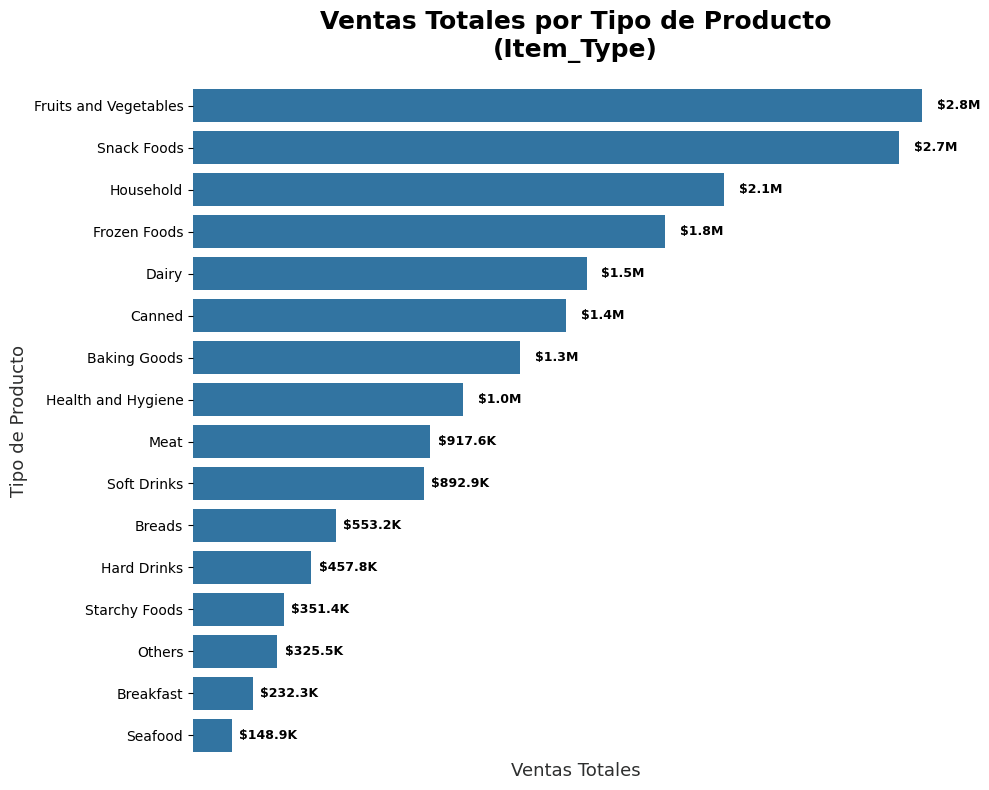

In [58]:
fig, ax = plt.subplots(figsize=(10, 8))

# 1. Crear el gráfico (Usando tu paleta)
sns.barplot(data=items_sales, x='Item_Outlet_Sales', y='Item_Type', ax=ax)#, color=AZUL_3)

# 2. Títulos y etiquetas
ax.set_title('Ventas Totales por Tipo de Producto\n(Item_Type)', 
             fontsize=18, fontweight='bold', pad=20)#, color=GRIS_1)
ax.set_xlabel('Ventas Totales', fontsize=13, color=GRIS_1)
ax.set_ylabel('Tipo de Producto', fontsize=13, color=GRIS_1)

# 3. Anotaciones
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    if width <= 0: continue
    
    ax.text(
        width + (items_sales['Item_Outlet_Sales'].max() * 0.05),                    
        bar.get_y() + bar.get_height()/2,   # Y: Centro vertical de la barra
        format_numbers(width),              # Texto formateado
        va='center', ha='center', 
        #color=GRIS_1, 
        fontweight='bold', fontsize=9
    )
    


# Limpieza visual
sns.despine(left=True, bottom=True)
ax.set_xticks([]) # Opcional: Quitar el eje X ya que los valores están en las barras
plt.tight_layout()
plt.show()

In [59]:
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75
2,Household,910,2055493.71,11.06,40.92,170,12091.14
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93
4,Dairy,682,1522594.05,8.19,58.93,125,12180.75
5,Canned,649,1444151.49,7.77,66.70,120,12034.60
6,Baking Goods,648,1265525.34,6.81,73.51,119,10634.67
7,Health and Hygiene,520,1045200.14,5.62,79.13,95,11002.11
8,Meat,425,917565.61,4.94,84.07,80,11469.57
9,Soft Drinks,445,892897.72,4.80,88.87,80,11161.22


In [60]:
avg_price = train_ds.groupby(['Item_Type']).agg(Item_Type_Avg_Price=('Item_MRP', 'mean')).reset_index()
avg_price

,Item_Type,Item_Type_Avg_Price
0,Baking Goods,126.38
1,Breads,140.95
2,Breakfast,141.79
3,Canned,139.76
4,Dairy,148.50
5,Frozen Foods,138.50
6,Fruits and Vegetables,144.58
7,Hard Drinks,137.08
8,Health and Hygiene,130.82
9,Household,149.42


In [61]:
train_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.00,8523.00,8523.00,8523.00,8523.00
mean,12.88,0.07,140.99,1997.83,2181.29
std,4.65,0.05,62.28,8.37,1706.50
min,4.55,0.00,31.29,1985.00,33.29
25%,8.79,0.03,93.83,1987.00,834.25
50%,12.65,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [62]:
items_sales = items_sales.merge(avg_price, on='Item_Type')
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale,Item_Type_Avg_Price
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45,144.58
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75,146.19
2,Household,910,2055493.71,11.06,40.92,170,12091.14,149.42
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93,138.50
4,Dairy,682,1522594.05,8.19,58.93,125,12180.75,148.50
5,Canned,649,1444151.49,7.77,66.70,120,12034.60,139.76
6,Baking Goods,648,1265525.34,6.81,73.51,119,10634.67,126.38
7,Health and Hygiene,520,1045200.14,5.62,79.13,95,11002.11,130.82
8,Meat,425,917565.61,4.94,84.07,80,11469.57,139.88
9,Soft Drinks,445,892897.72,4.80,88.87,80,11161.22,131.49


In [63]:
avg_visibility = train_ds.groupby(['Item_Type']).agg(Item_Type_Avg_Price=('Item_Visibility', 'mean')).reset_index()
items_sales = items_sales.merge(avg_visibility, on='Item_Type')
items_sales

,Item_Type,Sales_Volume,Item_Outlet_Sales,Sales_Share,Cumulative_Share,Item_Variety,Average_Item_Sale,Item_Type_Avg_Price_x,Item_Type_Avg_Price_y
0,Fruits and Vegetables,1232,2820059.82,15.17,15.17,220,12818.45,144.58,0.07
1,Snack Foods,1200,2732786.09,14.70,29.87,220,12421.75,146.19,0.07
2,Household,910,2055493.71,11.06,40.92,170,12091.14,149.42,0.06
3,Frozen Foods,856,1825734.79,9.82,50.75,155,11778.93,138.50,0.07
4,Dairy,682,1522594.05,8.19,58.93,125,12180.75,148.50,0.07
5,Canned,649,1444151.49,7.77,66.70,120,12034.60,139.76,0.07
6,Baking Goods,648,1265525.34,6.81,73.51,119,10634.67,126.38,0.07
7,Health and Hygiene,520,1045200.14,5.62,79.13,95,11002.11,130.82,0.06
8,Meat,425,917565.61,4.94,84.07,80,11469.57,139.88,0.06
9,Soft Drinks,445,892897.72,4.80,88.87,80,11161.22,131.49,0.06


### <font color='#c30afd'>**Observaciones: Tipos de Productos**</font>

A partir de los análisis realizados se determinaron los siguientes puntos:

* El **50% de las ventas provienen de 4 categorías** de productos:

  - ***Fruits and Vegetables:*** 2,820,059 | 15.17% de las ventas totales
  - ***Snack Foods:*** 2,732,786 | 14.70% de las ventas totales
  - ***Household***: 2,055,493 | 11.06% de las ventas totales
  - ***Frozen Foods***: 1,825,734 | 9.82% de las ventas totales

Si agregamos las **4 categorías siguientes** a las mencionadas anteriormente, la porción asciende hasta casi el 80% de las ventas totales de la cadena de negocio. 

Además, se identifica a ***Seafood*** como una categoría de nicho con alta eficiencia de venta por producto individual, lo que sugiere una oportunidad de expansión de inventario.

Conociendo que categorías son las más vendidas, podrán generar hipótesis a partir de el tipo de tienda y su ubicación en relación a la venta de dichos productos.

### <font color='#e698fe'>**2. ¿La mayor cantidad de ingresos proviene de productos saludables (Low Fat) o regulares (Regular)?**</font>

In [64]:
fat_content = train_ds.groupby(['Item_Fat_Content']).agg(
    Sales_Volume=('Item_Identifier', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum'),
    Item_Variety=('Item_Identifier', 'nunique')
)

In [65]:
fat_content

,Sales_Volume,Total_Sales,Item_Variety
Item_Fat_Content,,,
Low Fat,5517,11904094.53,1008
Regular,3006,6687030.88,551


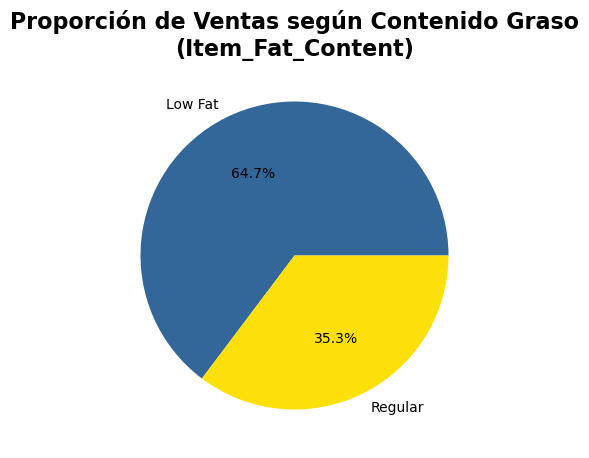

In [66]:
# Visualizar el volumen de ventas en relación al contenido graso (Item_Fat_Content)
fig, ax = plt.subplots(figsize=(6,5))
ax = plt.pie(data=fat_content,
             x=fat_content['Sales_Volume'],
             labels=["Low Fat", "Regular"],
             autopct='%1.1f%%',
             colors=[AZUL_3, AMARILLO_2])

plt.title('Proporción de Ventas según Contenido Graso\n(Item_Fat_Content)', fontsize=16, fontweight='bold')

plt.show()

### <font color='#c30afd'>**Observaciones**</font>

Si bien a simple vista el volumen de ventas se concentra en productos con bajo contenido graso, esta visualización puede estar sesgada debido a tipos de productos (`Item_Type`) que no presenten ambas clasificaciones: **Low Fat** y **Regular**.

Por lo que se realizará un análisis más detallado para entender la tendencia del consumo de los clientes.

In [67]:
# 1. Tu agregación inicial (asegúrate de resetear el índice o trabajar sobre él)
fat_content_shares = train_ds.groupby(['Item_Type', 'Item_Fat_Content']).agg(
    Sales_Volume=('Item_Identifier', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()

# 2. Calculamos el porcentaje relativo por cada Item_Type
# .groupby('Item_Type')['Total_Sales'].transform('sum') crea una serie del mismo tamaño que el df original
# con el total de la categoría repetido en cada fila correspondiente.
fat_content_shares['Fat_Content_Sales_Share'] = (
    fat_content_shares['Total_Sales'] / 
    fat_content_shares.groupby('Item_Type')['Total_Sales'].transform('sum')
) * 100

fat_content_shares['Fat_Content_Volume_Share'] = (
    fat_content_shares['Sales_Volume'] / 
    fat_content_shares.groupby('Item_Type')['Sales_Volume'].transform('sum')
) * 100

col_order = ['Item_Type', 'Item_Fat_Content', 'Sales_Volume', 'Fat_Content_Volume_Share', 'Total_Sales', 'Fat_Content_Sales_Share']
# Aplicamos el formato que configuramos antes
fat_content_shares[col_order]

,Item_Type,Item_Fat_Content,Sales_Volume,Fat_Content_Volume_Share,Total_Sales,Fat_Content_Sales_Share
0,Baking Goods,Low Fat,329,50.77,580523.67,45.87
1,Baking Goods,Regular,319,49.23,685001.67,54.13
2,Breads,Low Fat,140,55.78,305680.76,55.25
3,Breads,Regular,111,44.22,247556.42,44.75
4,Breakfast,Low Fat,41,37.27,99441.89,42.81
5,Breakfast,Regular,69,62.73,132857.06,57.19
6,Canned,Low Fat,341,52.54,753171.60,52.15
7,Canned,Regular,308,47.46,690979.89,47.85
8,Dairy,Low Fat,418,61.29,896682.80,58.89
9,Dairy,Regular,264,38.71,625911.26,41.11


### <font color='#c30afd'>**Observaciones: Contenido Graso del Producto**</font>

Se analizó la tendenia del consumo de los clientes en relación al contenido graso (`Item_Fat_Content`) de los productos ofrecidos por la cadena.

Principalmente, se tuvo en cuenta el volumen de venta de productos correspondiente a cada categoría (`Item_Type`), agrupándo los mismos dentro de esta según su contenido graso (`Item_Fat_Content`).

En la mayoría de casos, el volumen de venta de productos es mayor a aquellos que presentan bajo contenido graso (`Item_Fat_Content = 'Low Fat'`). Destacan en particular categorías como:

* ***Soft Drinks***: Aquí la diferencia en el volumen de ventas es extrema, con un **84.04%** para Soft Drinks con bajo contenido graso y **15.96%** para aquellos con contenido graso regular. (Aquí hay aspecto nutricional donde no se debe confundir "Low Fat" con "Low Calories", las bebidas como refrescos no suelen tener grasa, por lo que este dato no significa que la gente esté optando por **Soft Drinks "saludables"**.
  
* ***Dairy***: Los productos de esta categoría con un bajo contenido graso abarcan un **61.29%** del volumen de ventas total dentro de dicha categoría, mientras que aquellos con un contenido graso regular comprenden el **38.71%**.


A su vez, resulta interesante destacar que existen solo dos categorías donde el volumen de ventas es mayor para productos con un contenido graso regular (`Item_Fat_Content = 'Regular'`):

* ***Braekfast***: Donde los productos con un contenido graso regular abarcan el **62.73%** del volumen de ventas dentro de dicha categoría, mientras que aquellos con bajo contenido graso ocupan solo el **37.27%**.
  
* ***Meat***: Con un **60%** del volumen de venta para `Item_Fat_Content = 'Regular'` y **40%** para `Item_Fat_Content = 'Low Fat'`.

Esto indica que en estas dos categorías, el cliente no parece priorizar el contenido graso del producto, sino que considera otros factores al momento de hacer su elección de consumo.


Por último, cabe destacar, que existen casos en los que el volumen de ventas es mayor para productos **Low Fat**, y aún de así el ingreso generado es mayor por productos **Regular**, como por ejemplo: ***Baking Goods*** y ***Fruits and Vegetables***, lo cual puede deberse a que dichos productos sean más caros o de mayor tamaño.

### <font color='#e698fe'>**3. ¿La visibilidad del producto está relacionada a la venta total?**</font>

In [68]:
item_visibility = train_ds.groupby(['Outlet_Identifier', 'Item_Identifier']).agg(
    Average_Visivility_Score=('Item_Visibility', 'mean'),
    Sales_Volume=('Item_Outlet_Sales', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
item_visibility

,Outlet_Identifier,Item_Identifier,Average_Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.07,1,283.63
1,OUT010,DRA24,0.07,1,327.57
2,OUT010,DRA59,0.21,1,185.09
3,OUT010,DRB13,0.01,1,948.76
4,OUT010,DRB25,0.12,1,214.39
...,...,...,...,...,...
8518,OUT049,NCZ18,0.19,1,5580.74
8519,OUT049,NCZ30,0.03,1,2530.71
8520,OUT049,NCZ42,0.01,1,4740.50
8521,OUT049,NCZ53,0.02,1,3956.85


In [69]:
item_visibility_test = train_ds.groupby(['Outlet_Identifier', 'Item_Identifier']).agg(
    Visivility_Score=('Item_Visibility', 'sum'),
    Sales_Volume=('Item_Outlet_Sales', 'size'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
item_visibility_test

,Outlet_Identifier,Item_Identifier,Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.07,1,283.63
1,OUT010,DRA24,0.07,1,327.57
2,OUT010,DRA59,0.21,1,185.09
3,OUT010,DRB13,0.01,1,948.76
4,OUT010,DRB25,0.12,1,214.39
...,...,...,...,...,...
8518,OUT049,NCZ18,0.19,1,5580.74
8519,OUT049,NCZ30,0.03,1,2530.71
8520,OUT049,NCZ42,0.01,1,4740.50
8521,OUT049,NCZ53,0.02,1,3956.85


In [70]:
item_visibility_test[item_visibility_test['Item_Identifier'] == 'DRA12']

,Outlet_Identifier,Item_Identifier,Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.07,1,283.63
555,OUT013,DRA12,0.04,1,2552.68
1487,OUT017,DRA12,0.04,1,2552.68
2413,OUT018,DRA12,0.04,1,850.89
4804,OUT035,DRA12,0.00,1,992.71
5734,OUT045,DRA12,0.00,1,3829.02


In [71]:
item_visibility[item_visibility['Item_Identifier'] == 'DRA12']

,Outlet_Identifier,Item_Identifier,Average_Visivility_Score,Sales_Volume,Total_Sales
0,OUT010,DRA12,0.07,1,283.63
555,OUT013,DRA12,0.04,1,2552.68
1487,OUT017,DRA12,0.04,1,2552.68
2413,OUT018,DRA12,0.04,1,850.89
4804,OUT035,DRA12,0.00,1,992.71
5734,OUT045,DRA12,0.00,1,3829.02


In [72]:
item_visibility.describe()

,Average_Visivility_Score,Sales_Volume,Total_Sales
count,8523.00,8523.00,8523.00
mean,0.07,1.00,2181.29
std,0.05,0.00,1706.50
min,0.00,1.00,33.29
25%,0.03,1.00,834.25
50%,0.05,1.00,1794.33
75%,0.09,1.00,3101.30
max,0.33,1.00,13086.96


In [73]:
outlet_item_visibility = train_ds.groupby(['Outlet_Identifier', 'Item_Identifier', 'Item_Visibility']).agg(
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
outlet_item_visibility

,Outlet_Identifier,Item_Identifier,Item_Visibility,Total_Sales
0,OUT010,DRA12,0.07,283.63
1,OUT010,DRA24,0.07,327.57
2,OUT010,DRA59,0.21,185.09
3,OUT010,DRB13,0.01,948.76
4,OUT010,DRB25,0.12,214.39
...,...,...,...,...
8518,OUT049,NCZ18,0.19,5580.74
8519,OUT049,NCZ30,0.03,2530.71
8520,OUT049,NCZ42,0.01,4740.50
8521,OUT049,NCZ53,0.02,3956.85


In [74]:
scatter_item_visibility = train_ds.groupby(['Item_Identifier']).agg(
    Average_Item_Visibility=('Item_Visibility', 'mean'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
scatter_item_visibility.head()

,Item_Identifier,Average_Item_Visibility,Total_Sales
0,DRA12,0.03,11061.60
1,DRA24,0.05,15723.53
2,DRA59,0.13,20915.44
3,DRB01,0.08,4554.07
4,DRB13,0.01,12144.19


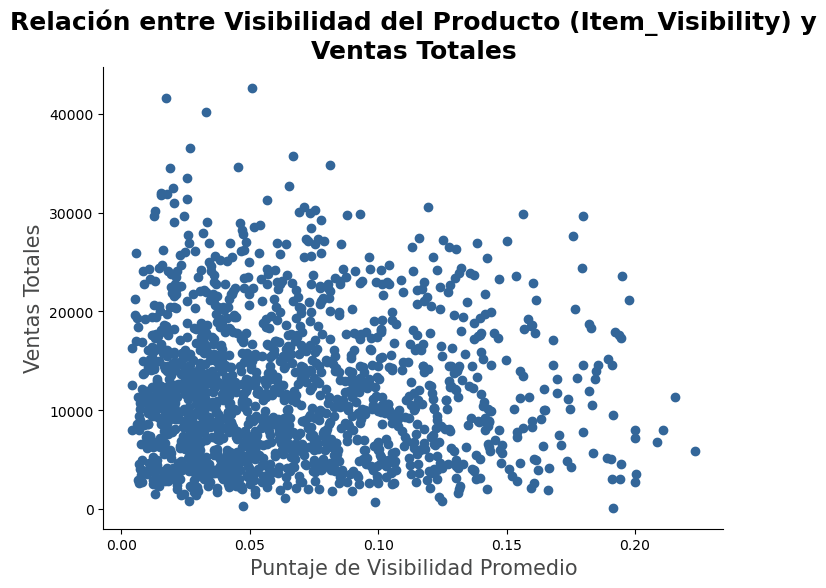

In [75]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(x=scatter_item_visibility['Average_Item_Visibility'], y=scatter_item_visibility['Total_Sales'], c=AZUL_3)
plt.title('Relación entre Visibilidad del Producto (Item_Visibility) y\nVentas Totales', fontsize=18, fontweight='bold')
plt.xlabel('Puntaje de Visibilidad Promedio', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)
sns.despine()

In [76]:
samples = outlet_item_visibility.sample(5, random_state=42)
samples_ids = samples['Item_Identifier'].unique()
outlet_item_visibility[outlet_item_visibility['Item_Identifier'].isin(samples_ids)].sort_values(by='Item_Identifier')

,Outlet_Identifier,Item_Identifier,Item_Visibility,Total_Sales
174,OUT010,FDJ03,0.12,49.27
856,OUT013,FDJ03,0.07,886.85
6043,OUT045,FDJ03,0.07,886.85
2707,OUT018,FDJ03,0.07,788.31
7031,OUT046,FDM34,0.07,1967.44
2791,OUT018,FDM34,0.07,1573.95
4239,OUT027,FDM34,0.07,3279.07
220,OUT010,FDM34,0.11,524.65
5350,OUT035,FDS27,0.01,2356.93
2023,OUT017,FDS27,0.01,3731.81


In [77]:
train_ds[(train_ds['Item_Identifier'] == 'FDT07')]# & (train_ds['Outlet_Identifier'].isin(['OUT045'

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1904,FDT07,5.82,Regular,0.08,Fruits and Vegetables,257.63,OUT013,1987,High,Tier 3,Supermarket Type1,1538.00
1993,FDT07,5.82,Regular,0.08,Fruits and Vegetables,255.43,OUT046,1997,Small,Tier 1,Supermarket Type1,4357.66
2331,FDT07,5.82,Regular,0.00,Fruits and Vegetables,256.63,OUT049,1999,Medium,Tier 1,Supermarket Type1,2050.66
2656,FDT07,5.82,Regular,0.08,Fruits and Vegetables,254.53,OUT017,2007,Small,Tier 2,Supermarket Type1,1281.66
2782,FDT07,5.82,Regular,0.14,Fruits and Vegetables,256.13,OUT019,1985,Small,Tier 1,Grocery Store,256.33
3917,FDT07,5.82,Regular,0.08,Fruits and Vegetables,257.63,OUT035,2004,Small,Tier 2,Supermarket Type1,4613.99
4995,FDT07,5.82,Regular,0.08,Fruits and Vegetables,255.33,OUT045,2002,Small,Tier 2,Supermarket Type1,4870.33
6444,FDT07,5.82,Regular,0.08,Fruits and Vegetables,256.43,OUT018,2009,Medium,Tier 3,Supermarket Type2,3844.99
7609,FDT07,5.82,Regular,0.08,Fruits and Vegetables,257.13,OUT027,1985,Medium,Tier 3,Supermarket Type3,7433.66


### <font color='#c30afd'>**Observaciones: Visibilidad del Producto**</font>

Los datos muestran que la **Visibilidad del Producto** (`Item_Visibility`) no está relacionada con las ventas del mismo.

El gráfico de puntos *(Scatter Plot)* muestra una dispersión con mucha variabilidad donde no es posible observar una tendencia sólida en cuanto al comportamiento de la relación analizada.

Si tomamos el siguiente ejemplo: **Item_Identifier = FDT07** para ver este fenómeno de cerca:

| Item_Identifier | Item_Visibility | Outlet_Identifier | Outlet_Size | Outlet_Location_Type | Outlet_Type       | Item_Outlet_Sale |
|-----------------|-----------------|-------------------|-------------|----------------------|-------------------|------------------|
| FDT07	          | 0.08            | OUT017	        | Small	      | Tier 2	             | Supermarket Type1 | 1281.66          |
| FDT07	          | 0.08	        | OUT035	        | Small	      | Tier 2	             | Supermarket Type1 | 4613.99          |
| FDT07	          | 0.08	        | OUT045	        | Small	      | Tier 2	             | Supermarket Type1 | 4870.33          |


Podemos ver que en las mismas condiciones: `Item_Visibility`, `Outlet_Size`, `Outlet_Location_Type` y `Outlet_Type`, la venta del producto en una de las tiendas en particular, es considerablemente menor en relación a las otras dos comparadas.
Esto indica, que a pesar de contar con la misma facilidad para ser encontrado, existen otros factores que influyen en la venta del producto.

#### **Nota**:

Una posible causa para esto sería que la manera de cualcular el score de visibilidad no está siendo aplicada correctamente, o que dicha métrica no contempla factores importantes para su cálculo. Se requiere más información para poder determinar el causante.

### <font color='#e698fe'>**4. ¿La rotación de productos está ligada al precio (MRP) o existen productos que a pesar de ser caros cuentan con un gran volumen de venta?**</font>

In [78]:
scatter_item_MRP = train_ds.groupby(['Item_Identifier']).agg(
    Average_Item_MRP=('Item_MRP', 'mean'),
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()
scatter_item_MRP.head()

,Item_Identifier,Average_Item_MRP,Total_Sales
0,DRA12,141.87,11061.60
1,DRA24,164.09,15723.53
2,DRA59,185.18,20915.44
3,DRB01,189.59,4554.07
4,DRB13,189.69,12144.19


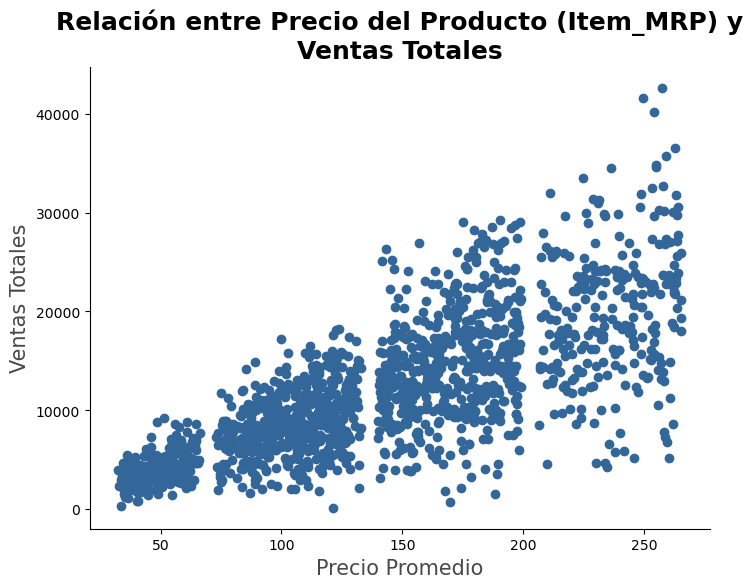

In [79]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(x=scatter_item_MRP['Average_Item_MRP'], y=scatter_item_MRP['Total_Sales'], c=AZUL_3)
plt.title('Relación entre Precio del Producto (Item_MRP) y\nVentas Totales', fontsize=18, fontweight='bold')
plt.xlabel('Precio Promedio', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)
sns.despine()

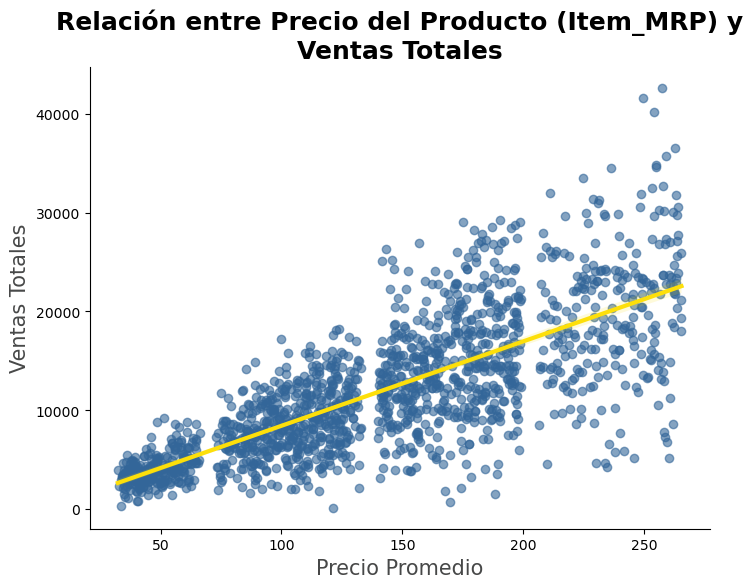

In [80]:
fig, ax = plt.subplots(figsize=(8,6))

# Dibujamos el scatter y la línea de tendencia en un solo paso
sns.regplot(
    data=scatter_item_MRP, 
    x='Average_Item_MRP', 
    y='Total_Sales',
    scatter_kws={'color': AZUL_3, 'alpha': 0.6}, 
    line_kws={'color': AMARILLO_2, 'lw': 3},      
    ax=ax
)

plt.title('Relación entre Precio del Producto (Item_MRP) y\nVentas Totales', fontsize=18, fontweight='bold')
plt.xlabel('Precio Promedio', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)
sns.despine()

### <font color='#c30afd'>**Observaciones: Máximo Precio Minorista**</font>

Al observar el gráfico de dispersión entre el Máximo Precio Minorista Promedio (`Item_MRP`) y las ventas totales de cada producto, resaltan dos factores principales:

* **Existe una fuerte correlación positiva: A mayor precio, mayor ingreso total.**

Sin embargo, la dispersión de los valores se vuelve más pronunciada a medida que el precio del prodcuto aumenta. Esto implica que mientras más alto sea el precio del producto, menor será la certeza de que este vaya a generar los ingresos esperados. El modelo de regresión, tendrá un mayor errror para productos con precios elevados. Esto deberá tratarse con alguna estandarización para disminución del error.

* **Se divisan 4 grupos marcados en los precios**

Es posible observar que existe un pequeño margen entre el promedio de precios que permite separar los datos en 4 subconjuntos, lo que sugiere que podría tratarse de una categorización de precios (Económico, Estándar, Premium, VIP). Esto podría abrir lugar a un análisis dirigido para estudiar cada grupo de manera individual.

## <font color='#fddf0a'>**Conclusiones: Productos**</font>

El anáisis de los productos, en particular las categorías de los mismos, arroja algunos insights de valor:

* #### <font color='#e698fe'>El **50% de los ingresos proviene de solo 4 categorías**:

***Fruits and Vegetables, Snacks Foods, Households, Frozen Foods*** aportan el 50% de los ingresos de la cadena de negocio. Estos son las categorías más comercializadas a lo largo de todas las tiendas, lo que implica que deben ser las mejor monitoreadas, ya que una leve variación el alguna de ellas puede tener un impacto financiero elevado.

* #### <font color='#e698fe'>**El Contenido Graso (`Item_Fat_Content`) y el Puntaje de Visibilidad (`Item_Visibility`) ofrecen señales estadísticas ruidosas**:

Por un lado, el contenido graso muestra una categorización demasiado general. En la categoría de ***Soft Drinks*** por ejemplo, el **84%** de las ventas corresponde a productos clasificados como **Low Fat**. Sin embargo, las bebidas como refrescos, tanto dietéticos como con azucar, no suelen contener grasas. De la  misma forma, categorías como ***Households*** o ***Health and Higene*** está clasificadas como "Low Fat", cuando no son productos comestibles. Esto podría normalizarse para no sesgar las estadísticas.

* #### <font color='#e698fe'>**Marcada correlación positiva entre el Máximo Precio Minorista Promedio y las Ventas Totales**:

Se observa que la variable objetivo (`Item_Outlet_Sales`) y el promedio de `Item_MRP` para cada producto tienen un comportamiento directamente proporcional.
También, se visualizó que existe heterocedasticidad: la varianza del error no es constante, sino que aumenta junto con el precio del producto. Por lo que será indispensable la estandarización de los datos para estabilizar el error.

## <font color='#fde74c'>**Tiendas**</font>

In [81]:
tiendas = train_ds[['Outlet_Identifier',
                    'Outlet_Establishment_Year', 
                    'Outlet_Size', 
                    'Outlet_Location_Type',
                    'Outlet_Type']].drop_duplicates()
tiendas

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
3,OUT010,1998,Small,Tier 3,Grocery Store
4,OUT013,1987,High,Tier 3,Supermarket Type1
7,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,OUT045,2002,Small,Tier 2,Supermarket Type1
9,OUT017,2007,Small,Tier 2,Supermarket Type1
11,OUT046,1997,Small,Tier 1,Supermarket Type1
19,OUT035,2004,Small,Tier 2,Supermarket Type1
23,OUT019,1985,Small,Tier 1,Grocery Store


Importante a tener en cuenta que existe desbalance de clases en las tiendas:

* 2 Grocery Stores
* 1 Supermarket Type2
* 1 Supermarket Type3
* 6 Supermarket Type1

De la misma manera, los tamaños de las tiendas están desbalanceados:

* 6 Small
* 3 Medium
* 1 High (Large)

Por lo que para el análisis se tendrán que analizar valores relativos.

### <font color='#e698fe'>**5. ¿Cómo es la venta promedio según el tipo de tienda?**</font>

Ya se observó en el la subsección de Productos que el 50% de las ventas provienen de 4 categorías. Ahora se analizará si esto se respeta dependiendo el tipo de tienda (`Outlet_Type`) observada.

In [82]:
outlet_type = train_ds.groupby(['Outlet_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Average_Sale=('Item_Outlet_Sales', 'mean'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()

In [83]:
outlet_type['Average_Items_Sold'] = outlet_type['Items_Sold'] / outlet_type['Outlet_Count']
outlet_type

,Outlet_Type,Outlet_Count,Average_Sale,Items_Sold,Average_Items_Sold
0,Grocery Store,2,339.83,1083,541.50
1,Supermarket Type1,6,2316.18,5577,929.50
2,Supermarket Type2,1,1995.50,928,928.00
3,Supermarket Type3,1,3694.04,935,935.00


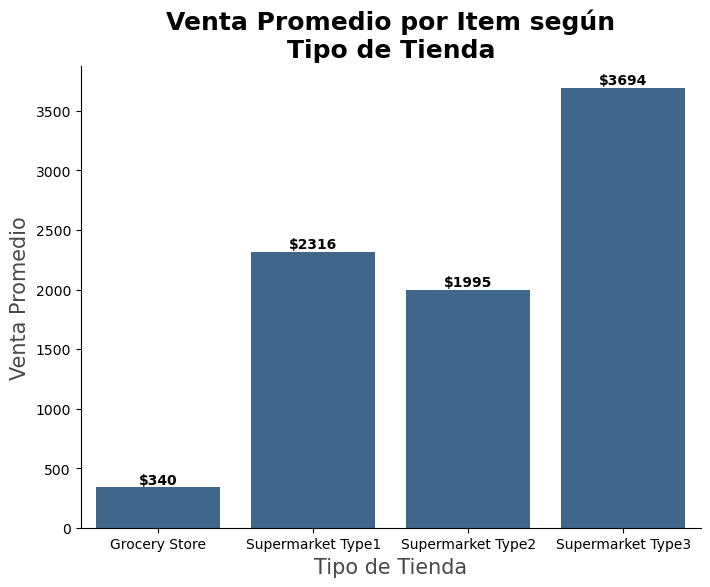

In [93]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=outlet_type, x='Outlet_Type', y='Average_Sale', color=AZUL_3)
plt.title('Venta Promedio por Item según\nTipo de Tienda', fontsize=18, fontweight='bold')
plt.xlabel('Tipo de Tienda', fontsize=15, color=GRIS_2)
plt.ylabel('Venta Promedio', fontsize=15, color=GRIS_2)

for bar in ax.patches:
    height = bar.get_height()
    if height == 0:
        continue
    else:
        ax.text(bar.get_x() + bar.get_width() / 2, 
                height + 30,
                f'${height:.0f}',
                ha='center',
                fontweight='bold')
        
sns.despine()
plt.show()

In [88]:
outlet_type_total_sale = train_ds.groupby(['Outlet_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Total_Sale=('Item_Outlet_Sales', 'sum'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()

outlet_type_total_sale['Type_Average_Sale'] = outlet_type_total_sale['Total_Sale'] / outlet_type_total_sale['Outlet_Count']
outlet_type_total_sale

,Outlet_Type,Outlet_Count,Total_Sale,Items_Sold,Type_Average_Sale
0,Grocery Store,2,368034.27,1083,184017.13
1,Supermarket Type1,6,12917342.26,5577,2152890.38
2,Supermarket Type2,1,1851822.83,928,1851822.83
3,Supermarket Type3,1,3453926.05,935,3453926.05


In [90]:
products_offered = train_ds.groupby(['Outlet_Identifier']).agg(
    Items_Sold=('Item_Identifier', 'nunique')
).reset_index()

products_offered.sort_values('Items_Sold')

,Outlet_Identifier,Items_Sold
4,OUT019,528
0,OUT010,555
2,OUT017,926
3,OUT018,928
7,OUT045,929
6,OUT035,930
8,OUT046,930
9,OUT049,930
1,OUT013,932
5,OUT027,935


### <font color='#c30afd'>**Observaciones: Venta Promedio**</font>

El evaular la venta promedio de las tiendas, es posible ver que ***Supermarket Type3*** presenta un rendimiento considerablemente superior.
Si se observan las tiendas que caen en la categoría Supermarket: ***Supermarket Type 1***, ***Supermarket Type 2*** y ***Supermarket Type 3***, la cantidad de items vendidos es similar entre ellos, rondando aproximadamente los 930 items. Sin embargo, la venta total promedio y venta por item promedio en cada uno de ellos:

| Tipo de Tienda          | Venta Total Promedio   | Venta Item Promedio |
|-------------------------|------------------------|---------------------|
|***Supermarket Type 1*** | 2152890.38             | 2316.18             |
|***Supermarket Type 2*** | 1851822.83             | 1995.50             |
|***Supermarket Type 3*** | 3453926.05             | 3694.04             |

A su vez, es posible observar que **Grocery Store** cuenta con una cantidad de productos vendidos significativamente menor. Esto destaca las diferencias en la dinámica entre las tiendas.

Esto sugiere que `Outlet_Type` será un fuerte indicador para el modelo de regresión.

### <font color='#e698fe'>**6. ¿Qué tan incidente resulta el tipo de ubicación (Outlet_Location_Type)?**</font>

In [85]:
outlet_location_type = train_ds.groupby(['Outlet_Location_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Average_Sale=('Item_Outlet_Sales', 'mean'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()

In [86]:
outlet_location_type

,Outlet_Location_Type,Outlet_Count,Average_Sale,Items_Sold
0,Tier 1,3,1876.91,2388
1,Tier 2,3,2323.99,2785
2,Tier 3,4,2279.63,3350


In [94]:
total_outlet_location_type = train_ds.groupby(['Outlet_Location_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Total_Sale=('Item_Outlet_Sales', 'sum'),
    Items_Sold=('Item_Identifier', 'size')
).reset_index()
total_outlet_location_type['Average_Location_Sale'] = total_outlet_location_type['Total_Sale'] / total_outlet_location_type['Outlet_Count']
total_outlet_location_type

,Outlet_Location_Type,Outlet_Count,Total_Sale,Items_Sold,Average_Location_Sale
0,Tier 1,3,4482059.07,2388,1494019.69
1,Tier 2,3,6472313.71,2785,2157437.90
2,Tier 3,4,7636752.63,3350,1909188.16


In [110]:
outlet_location_type = train_ds.groupby(['Outlet_Location_Type', 'Outlet_Type']).agg(
    Outlet_Count=('Outlet_Identifier', 'nunique'),
    Total_Sale=('Item_Outlet_Sales', 'sum')
).reset_index()
outlet_location_type['Average_Location_Sale'] = outlet_location_type['Total_Sale'] / outlet_location_type['Outlet_Count']
outlet_location_type.sort_values(by='Outlet_Type')

,Outlet_Location_Type,Outlet_Type,Outlet_Count,Total_Sale,Items_Sold,Average_Location_Sale
0,Tier 1,Grocery Store,1,179694.09,528,179694.09
3,Tier 3,Grocery Store,1,188340.17,555,188340.17
1,Tier 1,Supermarket Type1,2,4302364.98,1860,2151182.49
2,Tier 2,Supermarket Type1,3,6472313.71,2785,2157437.90
4,Tier 3,Supermarket Type1,1,2142663.58,932,2142663.58
5,Tier 3,Supermarket Type2,1,1851822.83,928,1851822.83
6,Tier 3,Supermarket Type3,1,3453926.05,935,3453926.05


### <font color='#c30afd'>**Observaciones: Tipo de Ubicación de la Tienda**</font>

Analizar las ventas promedios utilizando solo el **Tipo de Ubicación (`Outlet_Location_Type`)** resultó injusto ya que la distribución de los tipos de tiendas (`Outlet_Type`) no está balanceado.

Al cruzar dicho análisis con el tipo de tienda, pudiendo así realizar comparaciones entre el mismo tipo de tienda en los distintos tipos de ubicación, no se observan diferencias significativas gracias a esta última variable.

* ***Grocery Store***:

| Outlet_Location_Type	| Outlet_Type	    | Outlet_Count	| Total_Sale	| Average_Location_Sale |
|-----------------------|-------------------|---------------|---------------|-----------------------|
| Tier 1	            | Grocery Store	    | 1	            | 179694.09	    | 179694.09             |
| Tier 3	            | Grocery Store	    | 1	            | 188340.17	    | 188340.17             |

* ***Supermarket Type1***:

| Outlet_Location_Type	| Outlet_Type	    | Outlet_Count	| Total_Sale	| Average_Location_Sale |
|-----------------------|-------------------|---------------|---------------|-----------------------|
| Tier 1	            | Supermarket Type1	| 2	            | 4302364.98	| 2151182.49            |
| Tier 2	            | Supermarket Type1	| 3	            | 6472313.71	| 2157437.90            |
| Tier 3	            | Supermarket Type1	| 1	            | 2142663.58	| 2142663.58            |

Aquellos tipos de tiendas (`Outlet_Type`) que permiten comprar los distintos tipos de ubicación, demuestran que la misma, no impacta significativamente en las ventas promedio de cada tienda.

De lo cual, surgen algunas cuestiones que podrían evaluarse si se contara con mayor información:

* ¿Que diferencia de costos existe entre un Tipo de Ubicación y otro? ¿Justifica esto un margen de ventas poco significativo?
* De ser más costoso, ¿son las ventas lo único importante para mantener las tiendas en dichas ubicaciones? ¿O la presencia frente a la competencia es razón suficiente para mantener los costos más elevados a pesar de no generar mayores ingresos?

Estas preguntas pueden tenerse en cuenta para un análisis futuro.

### <font color='#e698fe'>**7. ¿Las tiendas grandes concentran mayor ventas de algún tipo de producto en particular?**</font>

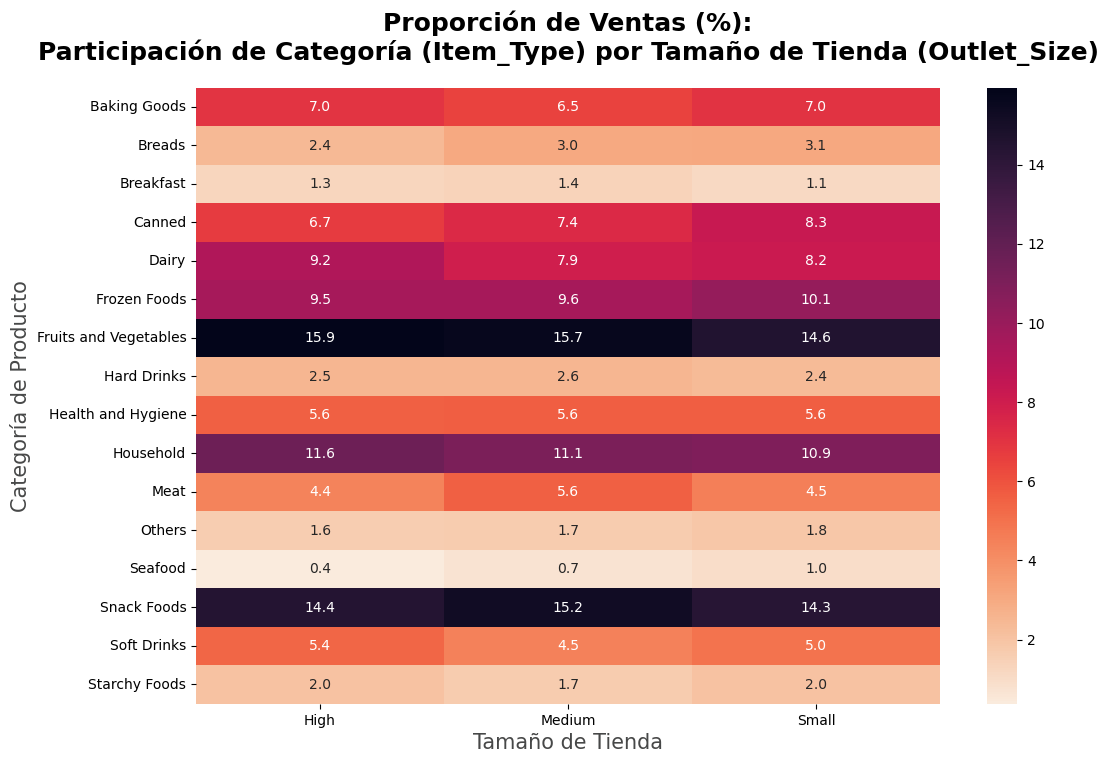

In [123]:
pivot_size_ventas = train_ds.pivot_table(
    index='Item_Type', 
    columns='Outlet_Size', 
    values='Item_Outlet_Sales', 
    aggfunc='sum'
)

pivot_size_share = (pivot_size_ventas / pivot_size_ventas.sum()) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_size_share, annot=True, fmt=".1f", cmap='rocket_r')
plt.title('Proporción de Ventas (%):\nParticipación de Categoría (Item_Type) por Tamaño de Tienda (Outlet_Size)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tamaño de Tienda', fontsize=15, c=GRIS_2)
plt.ylabel('Categoría de Producto', fontsize=15, c=GRIS_2)

plt.show()

In [124]:
pivot_size_share

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,6.99,6.47,7.05
Breads,2.43,3.01,3.08
Breakfast,1.28,1.38,1.14
Canned,6.71,7.42,8.31
Dairy,9.16,7.93,8.17
Frozen Foods,9.51,9.56,10.12
Fruits and Vegetables,15.94,15.68,14.55
Hard Drinks,2.54,2.55,2.37
Health and Hygiene,5.56,5.62,5.64


In [125]:
pivot_size_share['Avg_Share'] = (pivot_size_share['High'] + pivot_size_share['Medium'] + pivot_size_share['Small']) / 3

In [126]:
pivot_size_share['Std_Dev_Share'] = np.sqrt(((pivot_size_share['High'] - pivot_size_share['Avg_Share'])**2 + 
                                     (pivot_size_share['Medium'] - pivot_size_share['Avg_Share'])**2 +  
                                     (pivot_size_share['Small'] - pivot_size_share['Avg_Share'])**2) / 2)

In [127]:
pivot_size_share

Outlet_Size,High,Medium,Small,Avg_Share,Std_Dev_Share
Item_Type,,,,,
Baking Goods,6.99,6.47,7.05,6.83,0.32
Breads,2.43,3.01,3.08,2.84,0.36
Breakfast,1.28,1.38,1.14,1.26,0.12
Canned,6.71,7.42,8.31,7.48,0.80
Dairy,9.16,7.93,8.17,8.42,0.65
Frozen Foods,9.51,9.56,10.12,9.73,0.34
Fruits and Vegetables,15.94,15.68,14.55,15.39,0.74
Hard Drinks,2.54,2.55,2.37,2.49,0.10
Health and Hygiene,5.56,5.62,5.64,5.61,0.04


### <font color='#c30afd'>**Observaciones: Tamaño de tienda y Categoría de Producto**</font>

Se investigó si las tiendas grandes mostraban una mayor concentración en la venta de ciertos productos, sin embargo, al analizar los datos se observa que las diferencias no son significativas en relación al tamaño de la tienda.

Si bien algunos casos como ***Fruits and Vegetables*** la **couta de ventas** es **1.39% mayor en tiendas de tamaño grande *(High)* que en tiendas pequeñas *(Small)***, esto no implica un impacto significativo. 

Por dicha razón, se realizará el mismo análisis pero teniendo en cuenta el tipo de tienda (`Outlet_Type`) en lugar del tamaño de las mismas (`Outlet_Size`)

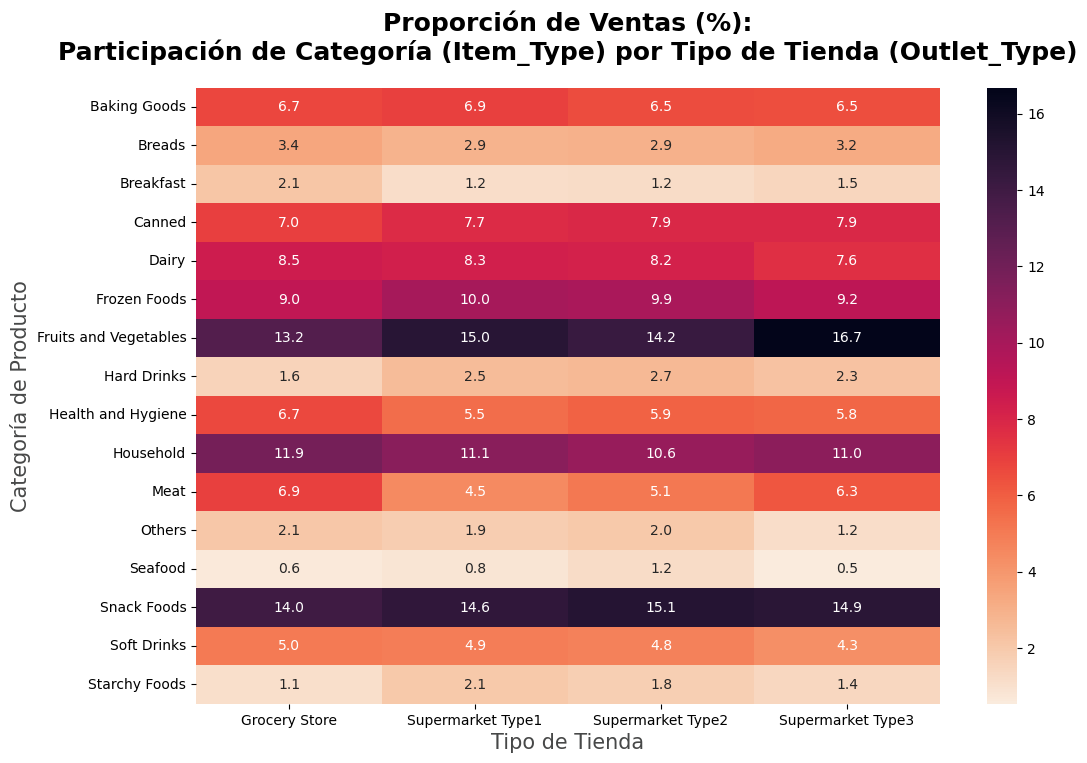

In [132]:
pivot_type_ventas = train_ds.pivot_table(
    index='Item_Type', 
    columns='Outlet_Type', 
    values='Item_Outlet_Sales', 
    aggfunc='sum'
)

pivot_type_share = (pivot_type_ventas / pivot_type_ventas.sum()) * 100


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_type_share, annot=True, fmt=".1f", cmap='rocket_r')
plt.title('Proporción de Ventas (%):\nParticipación de Categoría (Item_Type) por Tipo de Tienda (Outlet_Type)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tipo de Tienda', fontsize=15, c=GRIS_2)
plt.ylabel('Categoría de Producto', fontsize=15, c=GRIS_2)
plt.show()

In [133]:
pivot_type_share['Avg_Share'] = (pivot_type_share['Grocery Store'] + 
                                 pivot_type_share['Supermarket Type1'] + 
                                 pivot_type_share['Supermarket Type2'] +
                                 pivot_type_share['Supermarket Type3']) / 4

In [134]:
pivot_type_share['Std_Dev_Share'] = np.sqrt(((pivot_type_share['Grocery Store'] - pivot_type_share['Avg_Share'])**2 + 
                                     (pivot_type_share['Supermarket Type1'] - pivot_type_share['Avg_Share'])**2 +  
                                     (pivot_type_share['Supermarket Type2'] - pivot_type_share['Avg_Share'])**2 +
                                     (pivot_type_share['Supermarket Type3'] - pivot_type_share['Avg_Share'])**2)     / 3)

In [135]:
pivot_type_share

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Avg_Share,Std_Dev_Share
Item_Type,,,,,,
Baking Goods,6.75,6.93,6.54,6.49,6.68,0.20
Breads,3.42,2.91,2.95,3.20,3.12,0.24
Breakfast,2.13,1.17,1.21,1.46,1.49,0.44
Canned,7.00,7.75,7.87,7.88,7.62,0.42
Dairy,8.55,8.34,8.22,7.59,8.17,0.41
Frozen Foods,9.02,10.01,9.91,9.16,9.52,0.51
Fruits and Vegetables,13.21,14.96,14.23,16.68,14.77,1.46
Hard Drinks,1.59,2.50,2.67,2.29,2.26,0.48
Health and Hygiene,6.66,5.52,5.88,5.76,5.96,0.49


### <font color='#c30afd'>**Observaciones: Tipo de Tienda y Categoría de Producto**</font>

Al cruzar esta vez la cuota de ventas de cada categoría (`Item_Type`) de acuerdo al tipo de tienda (`Outlet_Type`), se sigue observando que esto no influye significativamente en la cuota de cada categoría.

Esto es un indicador de que la cadena opera con un inventario estandarizado, lo que permite mantener una oferta variada y estable en todas sus tiendas.

### <font color='#e698fe'>**8. ¿Las tiendas más antiguas presentan mayor ventas?**</font>

In [141]:
outlet_tenure = train_ds.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Establishment_Year']).agg(
    Total_Sales=('Item_Outlet_Sales', 'sum')
).reset_index()

In [154]:
from datetime import datetime
today = datetime.today().year

outlet_tenure['Outlet_Tenure'] = today - outlet_tenure['Outlet_Establishment_Year']

In [155]:
outlet_tenure.sort_values('Outlet_Type') 

,Outlet_Identifier,Outlet_Type,Outlet_Establishment_Year,Total_Sales,Outlet_Tenure
0,OUT010,Grocery Store,1998,188340.17,28
4,OUT019,Grocery Store,1985,179694.09,41
1,OUT013,Supermarket Type1,1987,2142663.58,39
2,OUT017,Supermarket Type1,2007,2167465.29,19
6,OUT035,Supermarket Type1,2004,2268122.94,22
7,OUT045,Supermarket Type1,2002,2036725.48,24
8,OUT046,Supermarket Type1,1997,2118395.17,29
9,OUT049,Supermarket Type1,1999,2183969.81,27
3,OUT018,Supermarket Type2,2009,1851822.83,17
5,OUT027,Supermarket Type3,1985,3453926.05,41


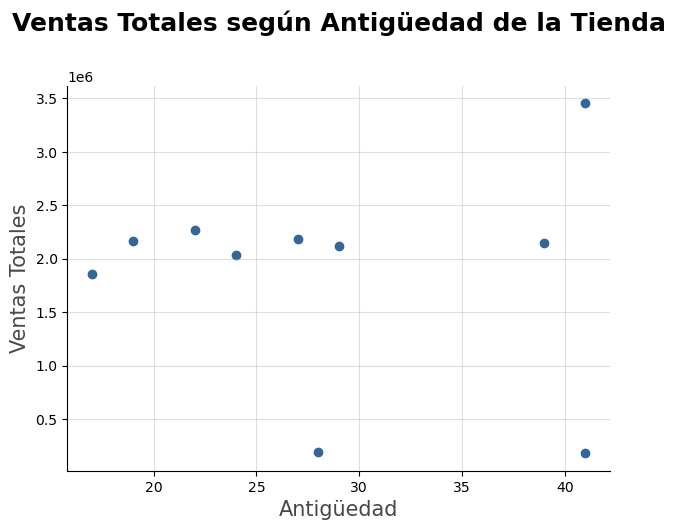

In [169]:
plt.figure(figsize=(7,5))
plt.scatter(data=outlet_tenure,
            x='Outlet_Tenure',
            y='Total_Sales',
            c=AZUL_3)

plt.title('Ventas Totales según Antigüedad de la Tienda', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Antigüedad', fontsize=15, c=GRIS_2)
plt.ylabel('Ventas Totales', fontsize=15, c=GRIS_2)

plt.grid('--', alpha=0.4)
sns.despine()

plt.show()

### <font color='#c30afd'>**Observaciones:**</font>

A simple vista es posible destacar que la antigüedad de cada tienda no tiene influencia en las ventas totales. Este característica no será un predictor significativo de la variable objetivo.

## <font color='#fddf0a'>**Conclusiones: Tiendas**</font>

Al analizár distintas características referentes a las tiendas, se determinó que:

* El tipo de tienda muestra una marcada diferencia en el volumen de ventas. Especialmente entre aquellos catalogados como Supermarket.
  > ***Supermarket Type3*** presenta una venta promedio considerablemente superior frente a los otros dos (***Supermarket Type1*** y ***Supermarket Type2***).

* El tipo de ubicación no presenta un impacto significativo en las ventas. Por lo que resulta necesario analizar los costos dentro de cada **"Tier"** o revisar el modo de categorización de los sectores.

* La cadena presenta una estabilidad operativa de inventario que permite una oferta variada en todas sus tiendas.

* La antigüedad no esta asociada a mayor cantidad de clientes o ventas.

# <font color='#7099c2'>**Modelado**</font>